In [30]:
pip install liac-arff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import arff
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection
# import chart_studio.plotly as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import os
import plotly.graph_objs as go
import plotly.offline as pyo

# import plotly.graph_objs as go
# from plotly.offline import iplot, init_notebook_mode

# init_notebook_mode(connected=True)

In [32]:
# Load the ARFF file
with open('cm1.arff', 'r') as f:
    data = arff.load(f)
# Convert the data to a Pandas DataFrame
cm1_df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

In [33]:
# Load the ARFF file
with open('jm1.arff', 'r') as f:
    data = arff.load(f)
# Convert the data to a Pandas DataFrame
jm1_df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

In [34]:
# Load the ARFF file
with open('pc1.arff', 'r') as f:
    data = arff.load(f)
# Convert the data to a Pandas DataFrame
pc1_df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

## Apply Machine Learning Models on JM 1 Dataset

In [35]:
cm1_df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,false
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,true
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1.0,0.0,6.0,0.0,15.0,15.0,44.0,19.0,9.0,false
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0.0,0.0,3.0,0.0,16.0,8.0,31.0,16.0,7.0,false
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0.0,0.0,3.0,0.0,16.0,12.0,46.0,26.0,11.0,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2.0,13.0,2.0,0.0,23.0,46.0,144.0,112.0,5.0,true
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1.0,7.0,4.0,0.0,22.0,23.0,67.0,40.0,7.0,true
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9.0,59.0,35.0,0.0,32.0,68.0,285.0,190.0,21.0,true
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1.0,12.0,4.0,0.0,13.0,13.0,19.0,13.0,3.0,true


In [36]:
cm1_df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [37]:
cm1_df.describe()


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,1938.056124,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,7453.591519,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,33.672500,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,204.310000,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,924.075000,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,119649.480000,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000


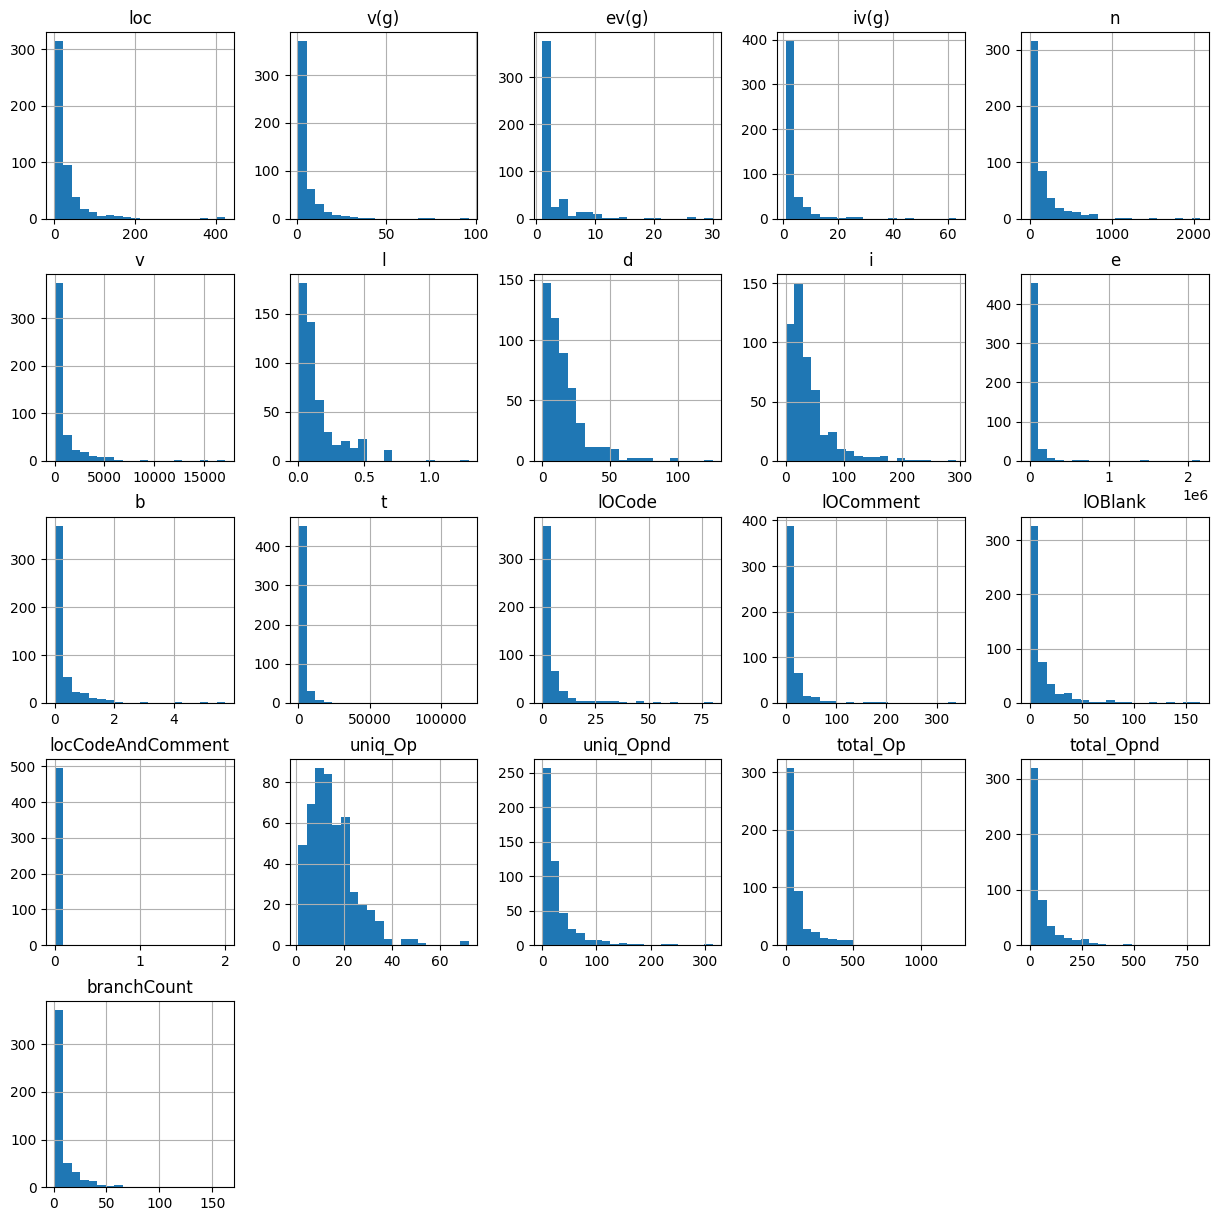

In [38]:
import matplotlib.pyplot as plt

cm1_df.hist(bins=20, figsize=(15, 15))
plt.show()

<ipython-input-39-392569194fce>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



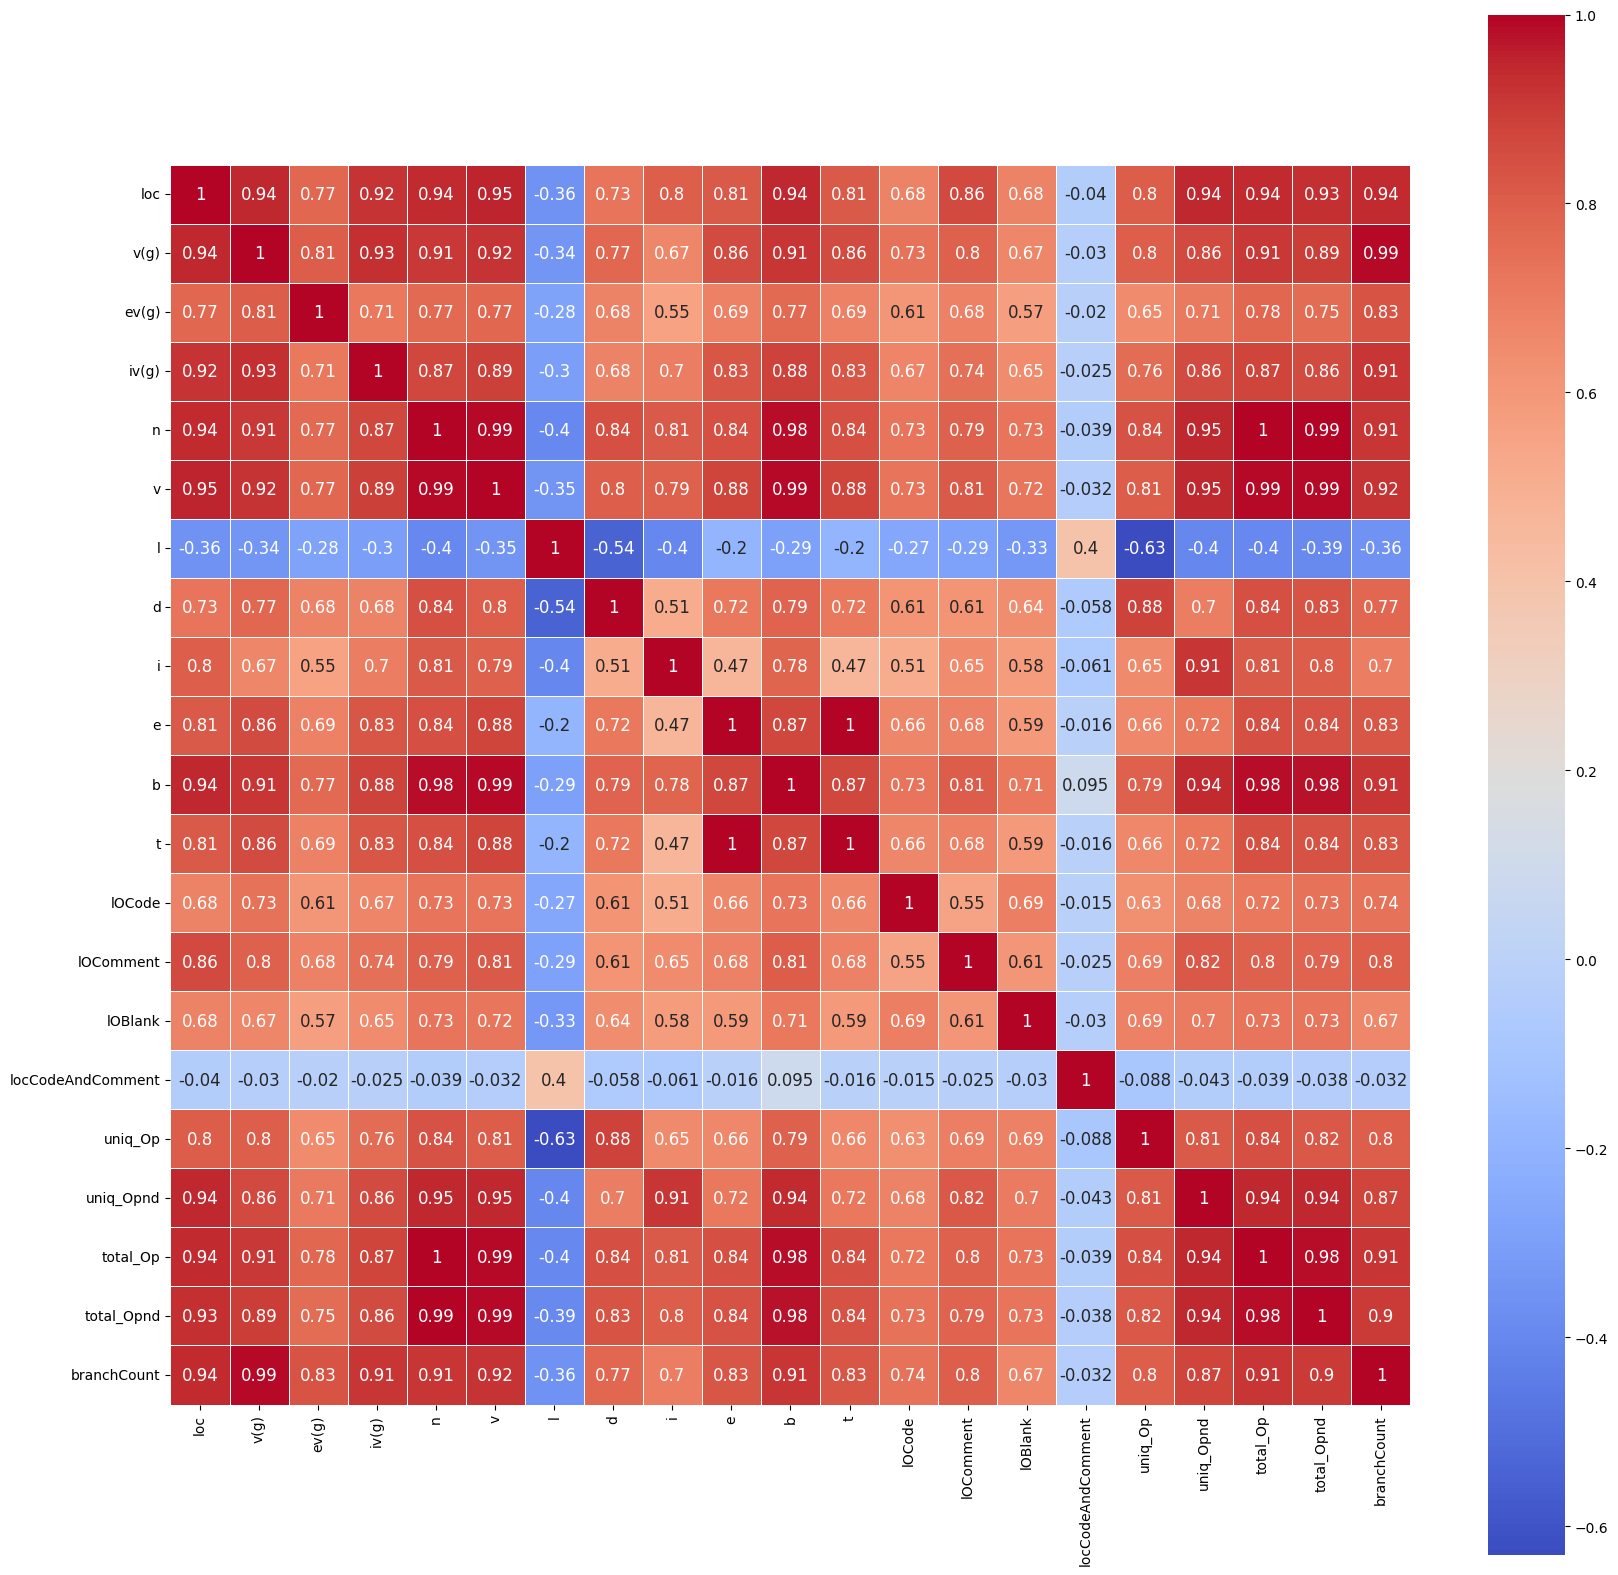

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = cm1_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=.5, linecolor='white', square=True, annot_kws={"size": 12})
plt.show()




In [40]:
cm1_df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [41]:
cm1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    float64
 13  lOComment          498 non-null    float64
 14  lOBlank            498 non-null    float64
 15  locCodeAndComment  498 non-null    float64
 16  uniq_Op            498 non

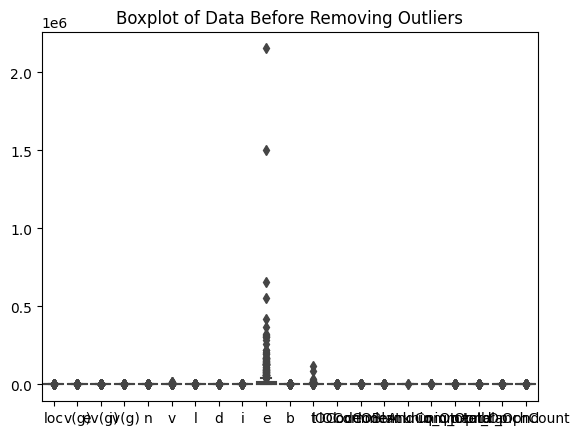

In [42]:
# Before removing outliers
sns.boxplot(data=cm1_df)
plt.title("Boxplot of Data Before Removing Outliers")
plt.show()

In [43]:
#Remove outliers using IQR method
Q1 = cm1_df.quantile(0.25)
Q3 = cm1_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cm1_df = cm1_df[~((cm1_df < lower_bound) | (cm1_df > upper_bound)).any(axis=1)]

<ipython-input-43-0fae7047adbd>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-43-0fae7047adbd>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-43-0fae7047adbd>:7: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



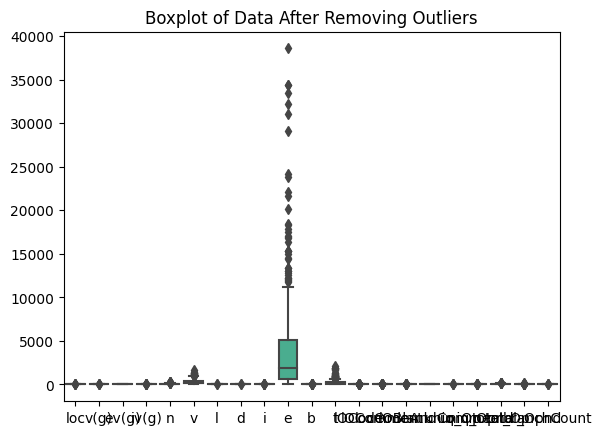

In [44]:
# After removing outliers
sns.boxplot(data=cm1_df)
plt.title("Boxplot of Data After Removing Outliers")
plt.show()


In [45]:
cm1_df.defects.value_counts()

false    258
true      20
Name: defects, dtype: int64

In [46]:
cm1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 2 to 496
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                278 non-null    float64
 1   v(g)               278 non-null    float64
 2   ev(g)              278 non-null    float64
 3   iv(g)              278 non-null    float64
 4   n                  278 non-null    float64
 5   v                  278 non-null    float64
 6   l                  278 non-null    float64
 7   d                  278 non-null    float64
 8   i                  278 non-null    float64
 9   e                  278 non-null    float64
 10  b                  278 non-null    float64
 11  t                  278 non-null    float64
 12  lOCode             278 non-null    float64
 13  lOComment          278 non-null    float64
 14  lOBlank            278 non-null    float64
 15  locCodeAndComment  278 non-null    float64
 16  uniq_Op            278 non

In [47]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the data
cm1_df['defects'] = le.fit_transform(cm1_df[['defects']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

<ipython-input-47-d14d85241f61>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
cm1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 2 to 496
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                278 non-null    float64
 1   v(g)               278 non-null    float64
 2   ev(g)              278 non-null    float64
 3   iv(g)              278 non-null    float64
 4   n                  278 non-null    float64
 5   v                  278 non-null    float64
 6   l                  278 non-null    float64
 7   d                  278 non-null    float64
 8   i                  278 non-null    float64
 9   e                  278 non-null    float64
 10  b                  278 non-null    float64
 11  t                  278 non-null    float64
 12  lOCode             278 non-null    float64
 13  lOComment          278 non-null    float64
 14  lOBlank            278 non-null    float64
 15  locCodeAndComment  278 non-null    float64
 16  uniq_Op            278 non

In [49]:
cm1_df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [77]:
# Separate the features and target variable
X = cm1_df.drop(['defects'], axis=1)
y = cm1_df['defects']

## Train Test Split data into 70:30 ratio

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Normalized data using standard Scaler 

In [79]:
from sklearn.preprocessing import StandardScaler
# Apply data normalization to the training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

## Remove constant features

In [80]:
# Step 3: Remove constant features
constant_columns = np.all(X_train_normalized == X_train_normalized[0, :], axis=0)
X_train_nonconstant = X_train_normalized[:, ~constant_columns]

In [81]:
constant_columns2 = np.all(X_test_normalized == X_test_normalized[0, :], axis=0)
X_test_nonconstant = X_test_normalized[:, ~constant_columns2]

In [75]:
X_train_nonconstant

array([[-0.58772563, -0.22156948,  0.15238082, ..., -0.73423336,
        -0.57900093, -0.2163853 ],
       [-0.79409445, -0.81039798, -0.62556336, ..., -1.04805746,
        -0.94184508, -0.85242695],
       [ 0.7536717 , -0.22156948,  0.15238082, ...,  0.83488714,
         1.64989882, -0.2163853 ],
       ...,
       [ 1.06322493, -0.22156948,  0.15238082, ...,  1.39279665,
         2.1682476 , -0.2163853 ],
       [-0.79409445, -0.81039798, -0.62556336, ..., -0.66449467,
        -0.73450557, -0.85242695],
       [-0.69091004, -0.81039798, -0.62556336, ..., -0.97831877,
        -0.99367996, -0.85242695]])

## Feature selection using SelectKBest on the normalized training and testing set

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif
# Apply feature selection using SelectKBest on the normalized training set
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_nonconstant, y_train)
X_test_selected = selector.fit_transform(X_test_nonconstant, y_test)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

print(scores)

[0.40947595 0.20261278 0.24409329 0.16433008 0.15103574 0.1956583
 0.19128647 0.09241179 0.11041618 0.15114841 0.11041809 0.02650989
 0.73313    1.         0.20467349 0.12806267 0.18943132 0.12398864
 0.15114686]


## Apply SMOTE to the selected features (only for training)

In [83]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
# apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

# print the original and resampled class distribution
print('Original class distribution:', y_train.shape)
print('Resampled class distribution:', y_resampled.shape)

Original class distribution: (194,)
Resampled class distribution: (358,)


In [85]:
X_train=X_resampled
y_train=y_resampled
X_test=X_test_selected


## Decison Tree

In [86]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

           0       0.98      0.82      0.90        79
           1       0.22      0.80      0.35         5

    accuracy                           0.82        84
   macro avg       0.60      0.81      0.62        84
weighted avg       0.94      0.82      0.86        84

[[65 14]
 [ 1  4]]
ACC:  0.8214285714285714


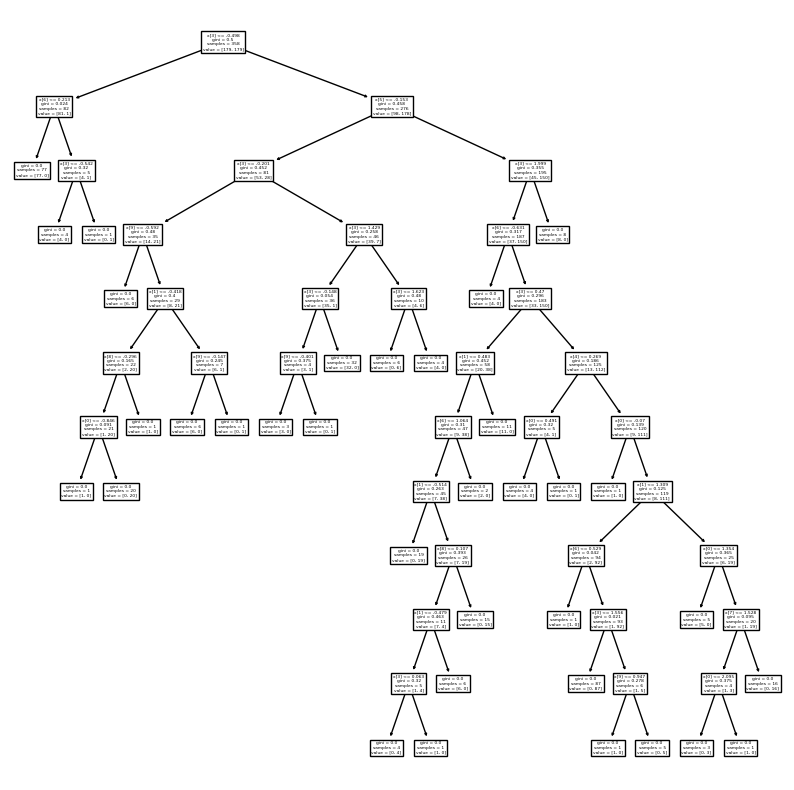

In [87]:
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(model, ax=ax)
plt.show()

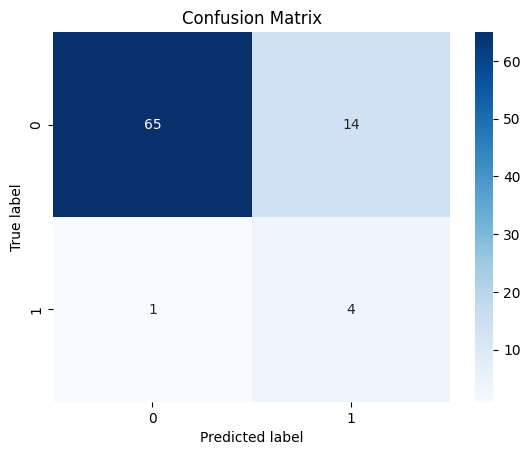

In [89]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## KNN Model

In [90]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

           0       0.95      0.71      0.81        79
           1       0.08      0.40      0.13         5

    accuracy                           0.69        84
   macro avg       0.51      0.55      0.47        84
weighted avg       0.90      0.69      0.77        84

[[56 23]
 [ 3  2]]
ACC:  0.6904761904761905


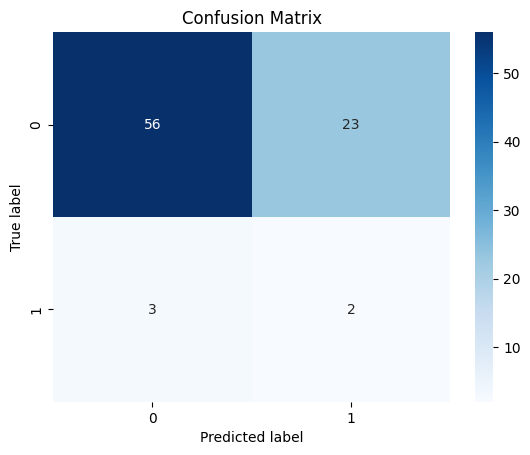

In [91]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Logistic Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Logistic Algorithm
              precision    recall  f1-score   support

           0       0.98      0.76      0.86        79
           1       0.17      0.80      0.29         5

    accuracy                           0.76        84
   macro avg       0.58      0.78      0.57        84
weighted avg       0.94      0.76      0.82        84

[[60 19]
 [ 1  4]]
ACC:  0.7619047619047619


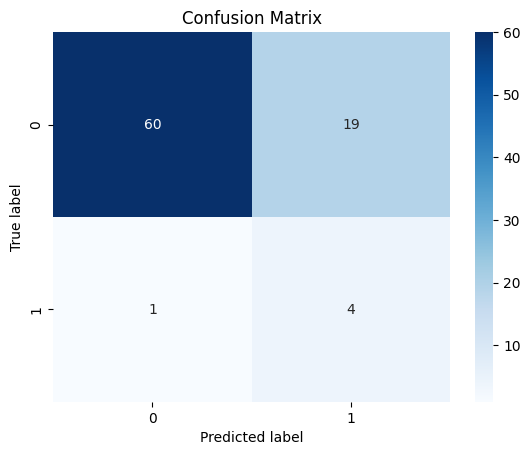

In [93]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes

In [94]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [95]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Naive Bayes Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Naive Bayes Algorithm
              precision    recall  f1-score   support

           0       0.98      0.71      0.82        79
           1       0.15      0.80      0.25         5

    accuracy                           0.71        84
   macro avg       0.57      0.75      0.54        84
weighted avg       0.93      0.71      0.79        84

[[56 23]
 [ 1  4]]
ACC:  0.7142857142857143


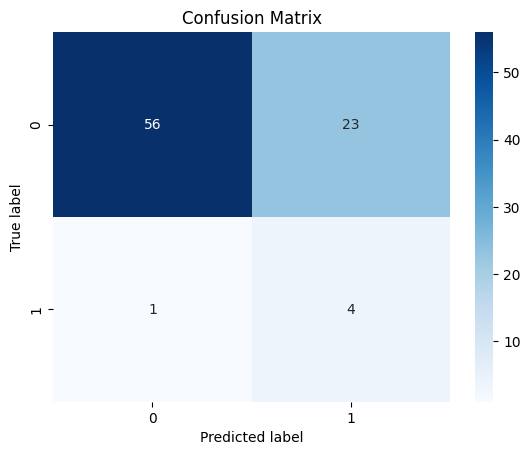

In [96]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forests Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forests Algorithm
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        79
           1       0.00      0.00      0.00         5

    accuracy                           0.89        84
   macro avg       0.47      0.47      0.47        84
weighted avg       0.88      0.89      0.89        84

[[75  4]
 [ 5  0]]
ACC:  0.8928571428571429


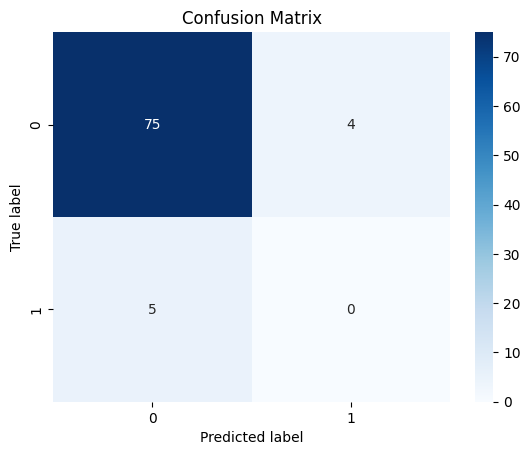

In [98]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## SVM Model

In [99]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

SVM Algorithm
              precision    recall  f1-score   support

           0       0.98      0.76      0.86        79
           1       0.17      0.80      0.29         5

    accuracy                           0.76        84
   macro avg       0.58      0.78      0.57        84
weighted avg       0.94      0.76      0.82        84

[[60 19]
 [ 1  4]]
ACC:  0.7619047619047619


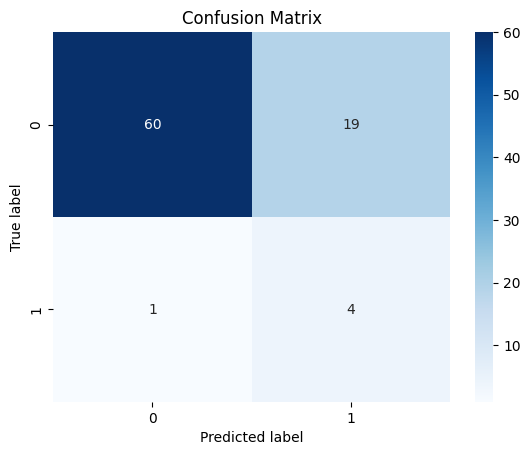

In [100]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Apply Machine Learning Model on JM 1 Dataset

In [101]:
jm1_df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,false
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,true
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,true
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,true
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13.0,0.0,2.0,0.0,10.0,15.0,30.0,22.0,7.0,false
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5.0,0.0,2.0,0.0,12.0,8.0,19.0,11.0,3.0,false
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29.0,1.0,10.0,0.0,18.0,15.0,59.0,44.0,7.0,false
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6.0,0.0,2.0,0.0,9.0,8.0,21.0,15.0,1.0,false


In [102]:
jm1_df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [103]:
jm1_df.describe()


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,...,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,...,2.046465e+03,26.252274,2.737529,4.62554,0.370785,11.177592,16.751857,68.110588,46.388989,11.292316
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,...,2.413154e+04,59.611201,9.008608,9.96813,1.907969,10.045255,26.667883,151.513836,100.351845,22.597617
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,...,9.000000e+00,4.000000,0.000000,0.00000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,...,1.128300e+02,13.000000,0.000000,2.00000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,...,6.342500e+02,28.000000,2.000000,5.00000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,...,1.726655e+06,2824.000000,344.000000,447.00000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


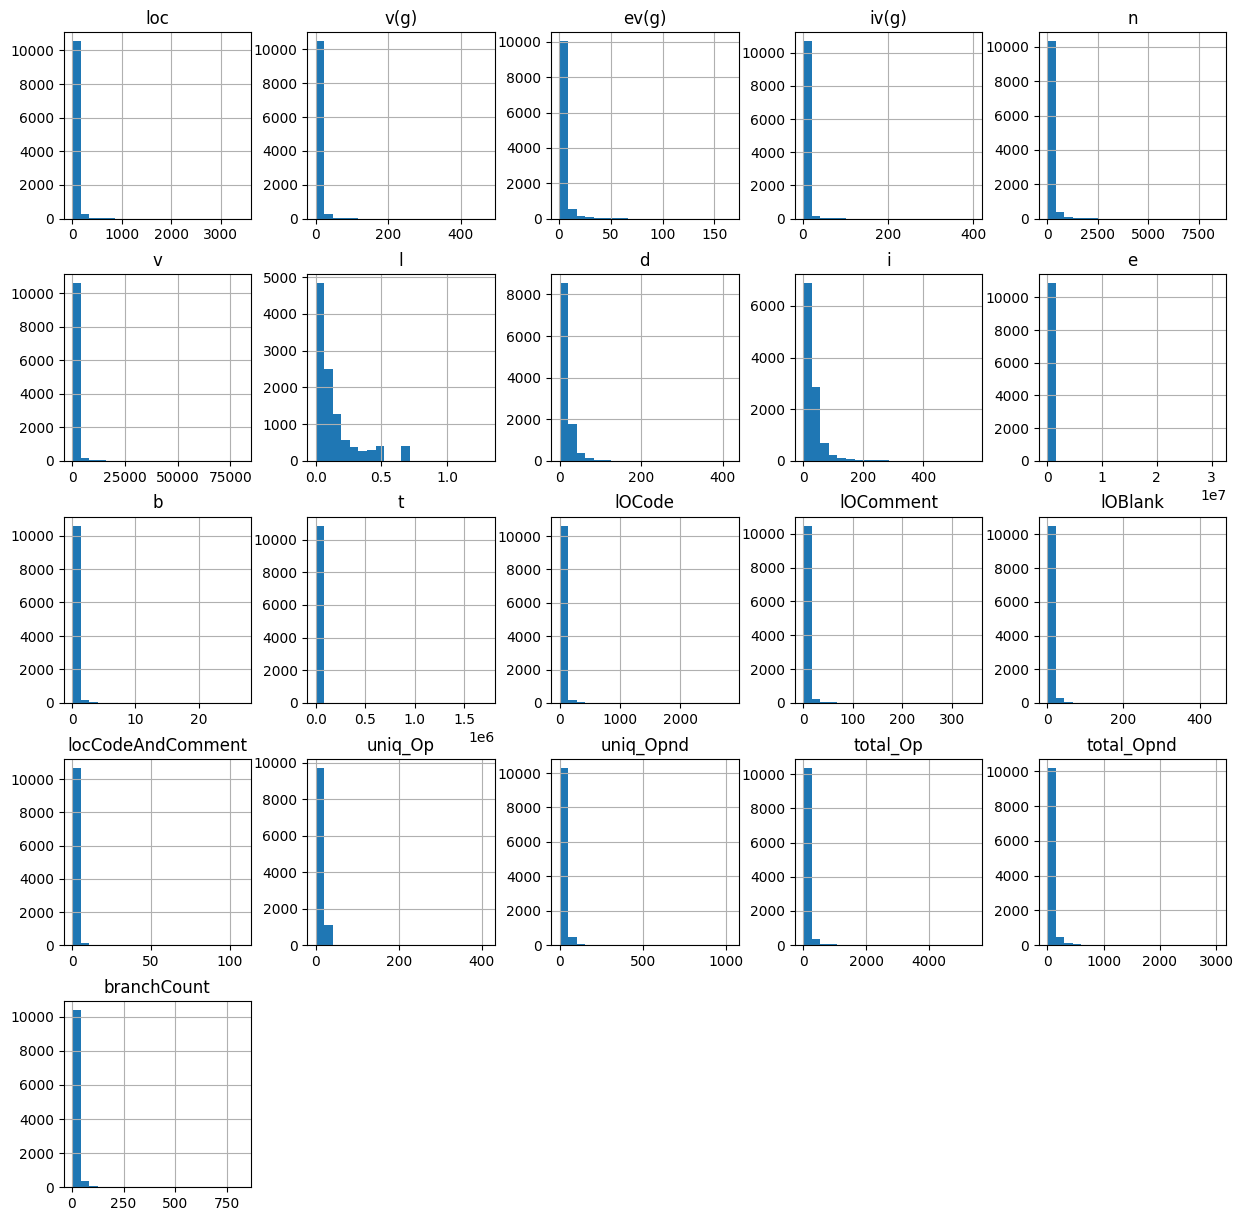

In [104]:
import matplotlib.pyplot as plt

jm1_df.hist(bins=20, figsize=(15, 15))
plt.show()

<ipython-input-105-75ffd9b29db9>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



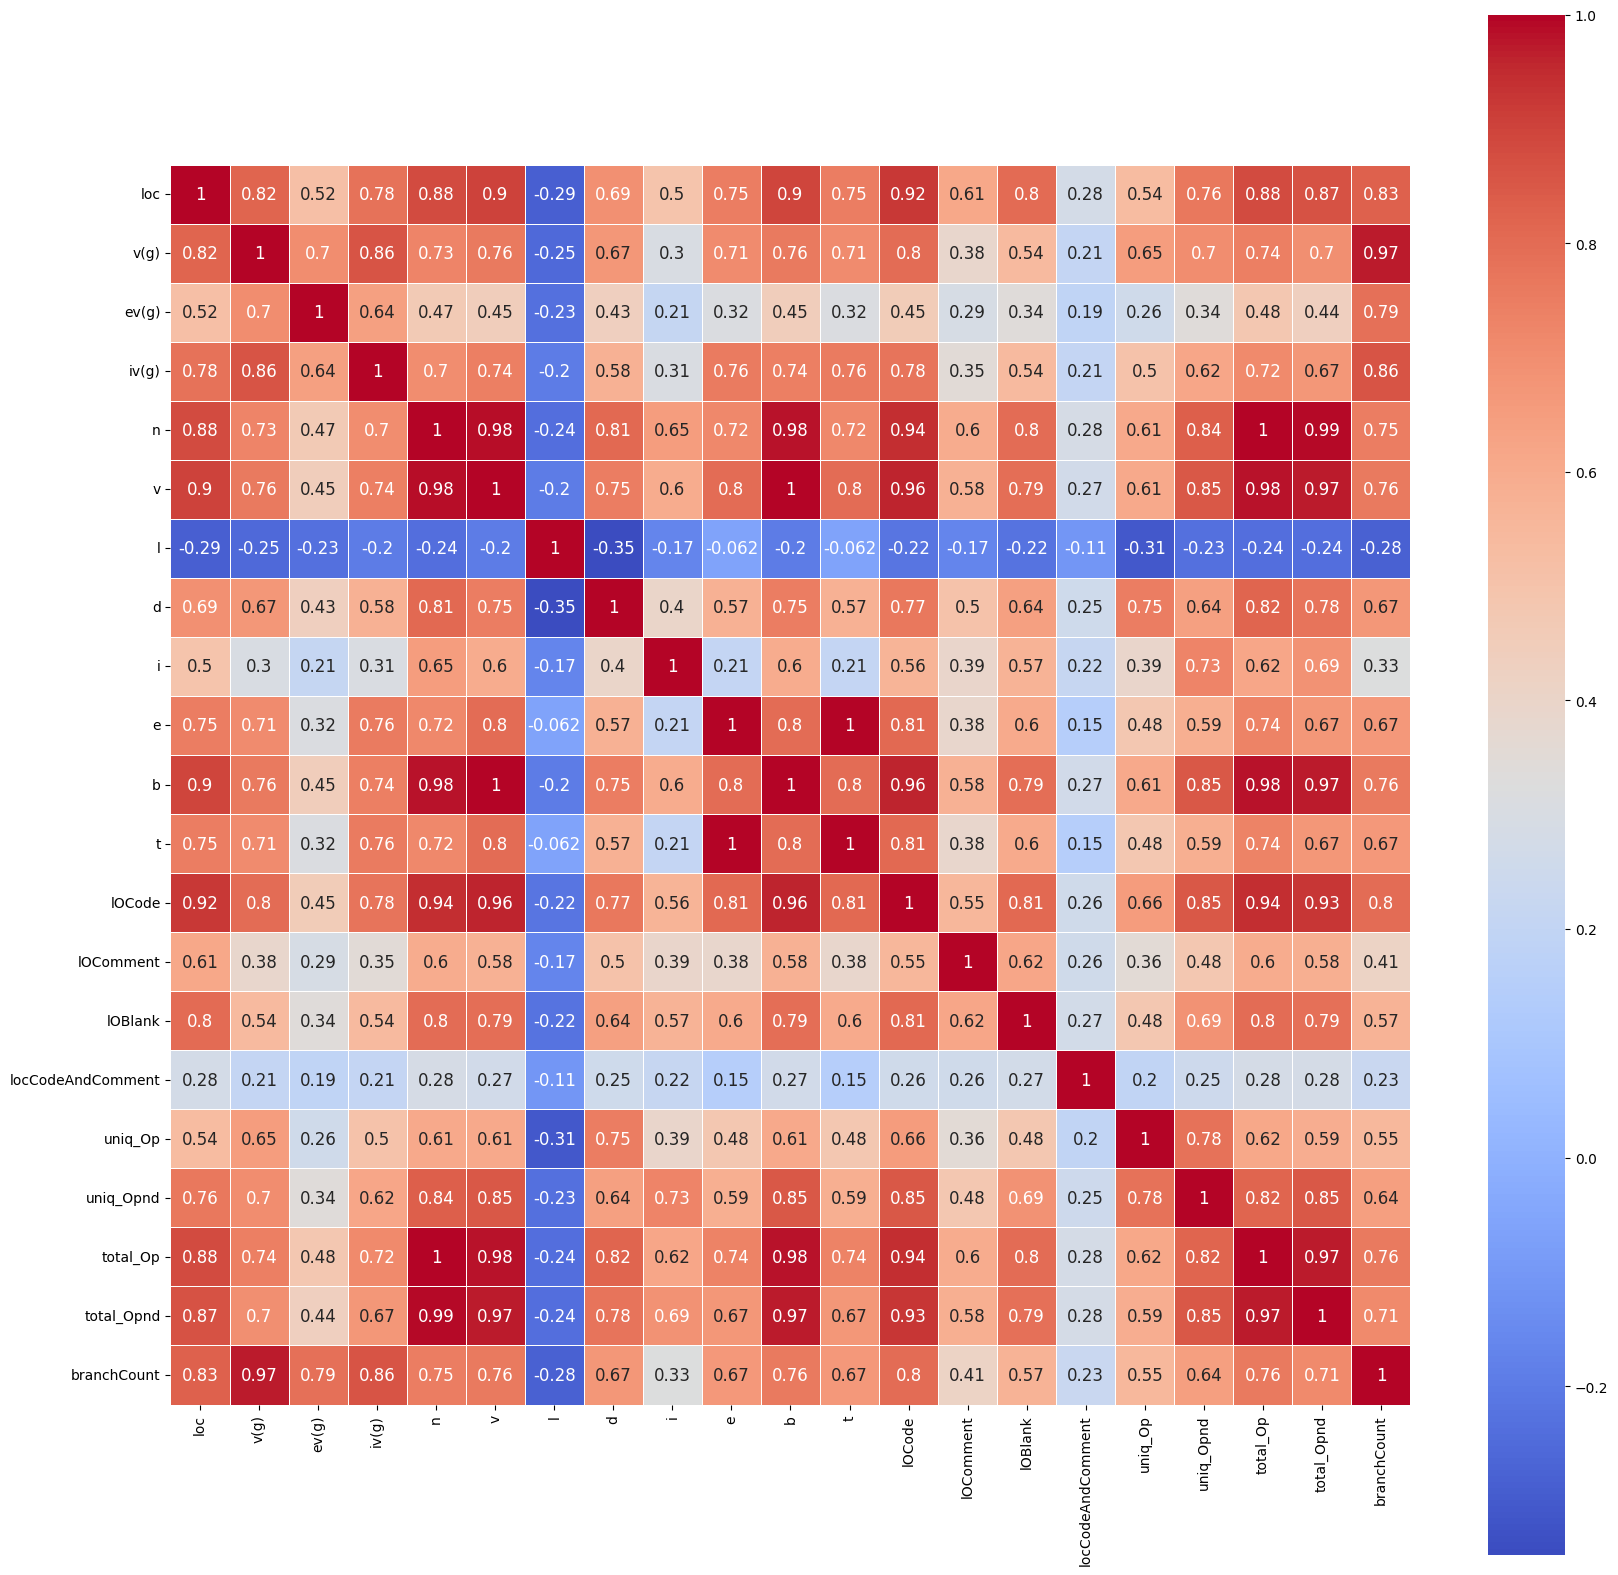

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = jm1_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=.5, linecolor='white', square=True, annot_kws={"size": 12})
plt.show()




In [106]:
jm1_df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [107]:
jm1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  float64
 13  lOComment          10885 non-null  float64
 14  lOBlank            10885 non-null  float64
 15  locCodeAndComment  10885 non-null  float64
 16  uniq_Op            108

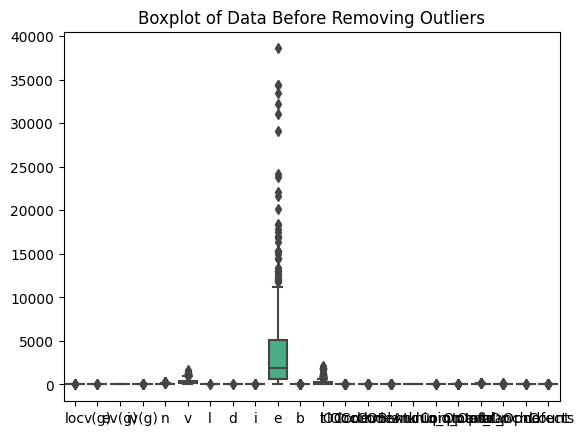

In [108]:
# Before removing outliers
sns.boxplot(data=cm1_df)
plt.title("Boxplot of Data Before Removing Outliers")
plt.show()

In [109]:
# Remove outliers using IQR method
Q1 = cm1_df.quantile(0.25)
Q3 = cm1_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cm1_df = cm1_df[~((cm1_df < lower_bound) | (cm1_df > upper_bound)).any(axis=1)]

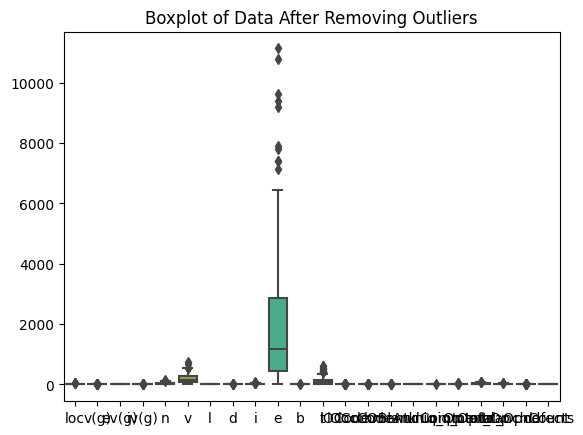

In [110]:
# After removing outliers
sns.boxplot(data=cm1_df)
plt.title("Boxplot of Data After Removing Outliers")
plt.show()


In [111]:
jm1_df.defects.value_counts()

false    8779
true     2106
Name: defects, dtype: int64

In [112]:
jm1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  float64
 13  lOComment          10885 non-null  float64
 14  lOBlank            10885 non-null  float64
 15  locCodeAndComment  10885 non-null  float64
 16  uniq_Op            108

In [113]:
# Count the number of missing values in each column
jm1_df.isna().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [114]:
# Drop rows with NaN values
jm1_df = jm1_df.dropna()

In [115]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the data
jm1_df['defects'] = le.fit_transform(jm1_df[['defects']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

<ipython-input-115-1af5561ce1c2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
# Separate the features and target variable
X = jm1_df.drop(['defects'], axis=1)
y = jm1_df['defects']

## Train Test Split data into 70:30 ratio

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Normalized data using standard Scaler 

In [118]:
from sklearn.preprocessing import StandardScaler
# Apply data normalization to the training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

## Remove constant features

In [119]:
# Step 3: Remove constant features
constant_columns = np.all(X_train_normalized == X_train_normalized[0, :], axis=0)
X_train_nonconstant = X_train_normalized[:, ~constant_columns]

In [120]:
constant_columns2 = np.all(X_test_normalized == X_test_normalized[0, :], axis=0)
X_test_nonconstant = X_test_normalized[:, ~constant_columns2]

In [121]:
X_train_nonconstant

array([[ 0.84909949, -0.01894875, -0.35926721, ...,  0.70523908,
         0.53918745, -0.09968179],
       [-0.51501781, -0.44606405, -0.35926721, ..., -0.42884012,
        -0.4343721 , -0.49241685],
       [ 0.1089933 , -0.10437181, -0.35926721, ..., -0.47007937,
        -0.47536408, -0.09968179],
       ...,
       [-0.54404158, -0.44606405, -0.35926721, ..., -0.4082205 ,
        -0.40362811, -0.49241685],
       [-0.52952969, -0.44606405, -0.35926721, ..., -0.42884012,
        -0.4343721 , -0.49241685],
       [ 0.35569536,  0.0664743 , -0.04790257, ...,  0.01791835,
         0.06777967,  0.09668574]])

## Feature selection using SelectKBest on the normalized training and testing set

In [122]:
from sklearn.feature_selection import SelectKBest, f_classif
# Apply feature selection using SelectKBest on the normalized training set
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_nonconstant, y_train)
X_test_selected = selector.fit_transform(X_test_nonconstant, y_test)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

print(scores)

[1.         0.81994862 0.67838697 0.62190877 0.7092631  0.57254456
 0.56559393 0.60102911 0.61544602 0.12856328 0.57265212 0.12856329
 0.5919864  0.5207982  0.67798592 0.26915261 0.44580181 0.71102892
 0.66921513 0.75120418 0.93456336]


## Apply SMOTE to the selected features (only for training)

In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
# apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

# print the original and resampled class distribution
print('Original class distribution:', y_train.shape)
print('Resampled class distribution:', y_resampled.shape)

Original class distribution: (7616,)
Resampled class distribution: (12246,)


In [124]:
X_train=X_resampled
y_train=y_resampled
X_test=X_test_selected


## Decision Tree

In [125]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

           0       0.70      0.14      0.23      2654
           1       0.16      0.73      0.27       610

    accuracy                           0.25      3264
   macro avg       0.43      0.44      0.25      3264
weighted avg       0.60      0.25      0.24      3264

[[ 374 2280]
 [ 163  447]]
ACC:  0.25153186274509803


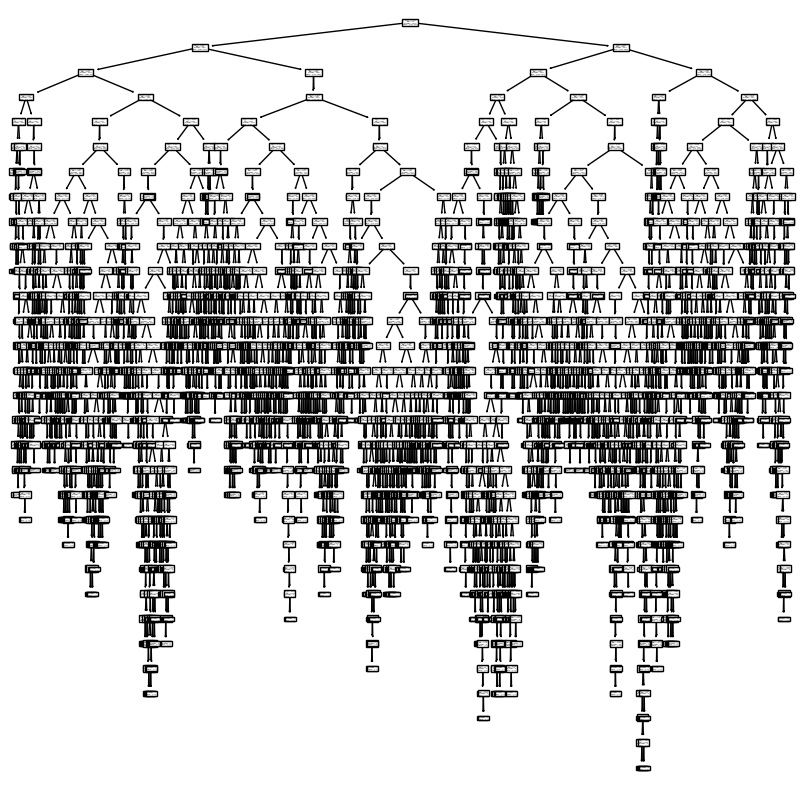

In [126]:
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(model, ax=ax)
plt.show()

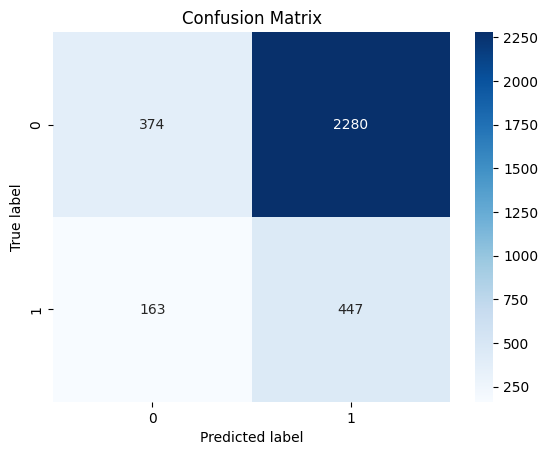

In [128]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## KNN Model

In [129]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      2654
           1       0.26      0.53      0.35       610

    accuracy                           0.63      3264
   macro avg       0.56      0.59      0.54      3264
weighted avg       0.74      0.63      0.66      3264

[[1719  935]
 [ 287  323]]
ACC:  0.6256127450980392


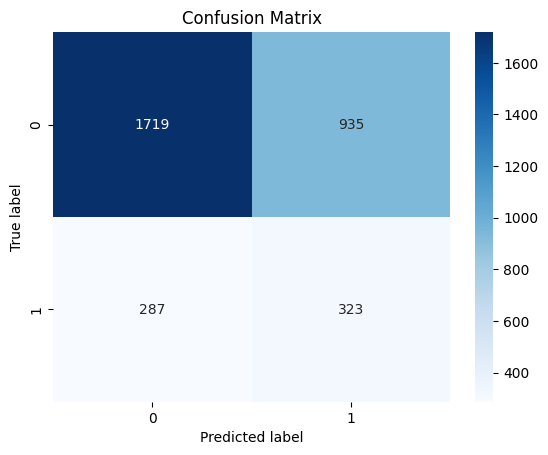

In [130]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Logistic Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Logistic Algorithm
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2654
           1       0.32      0.42      0.36       610

    accuracy                           0.73      3264
   macro avg       0.59      0.61      0.59      3264
weighted avg       0.76      0.73      0.74      3264

[[2114  540]
 [ 354  256]]
ACC:  0.7261029411764706


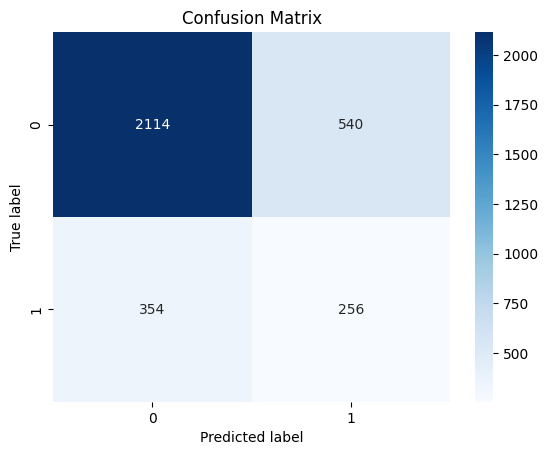

In [132]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes

In [133]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [134]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Naive Bayes Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Naive Bayes Algorithm
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2654
           1       0.50      0.21      0.30       610

    accuracy                           0.81      3264
   macro avg       0.67      0.58      0.60      3264
weighted avg       0.78      0.81      0.78      3264

[[2523  131]
 [ 480  130]]
ACC:  0.8128063725490197


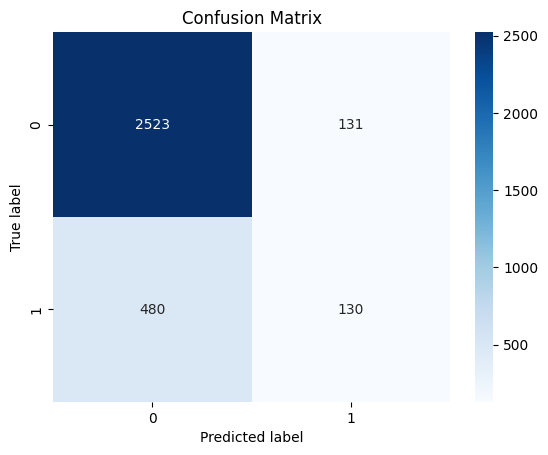

In [135]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forests Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forests Algorithm
              precision    recall  f1-score   support

           0       0.72      0.12      0.21      2654
           1       0.17      0.79      0.28       610

    accuracy                           0.25      3264
   macro avg       0.44      0.46      0.25      3264
weighted avg       0.62      0.25      0.22      3264

[[ 326 2328]
 [ 128  482]]
ACC:  0.24754901960784315


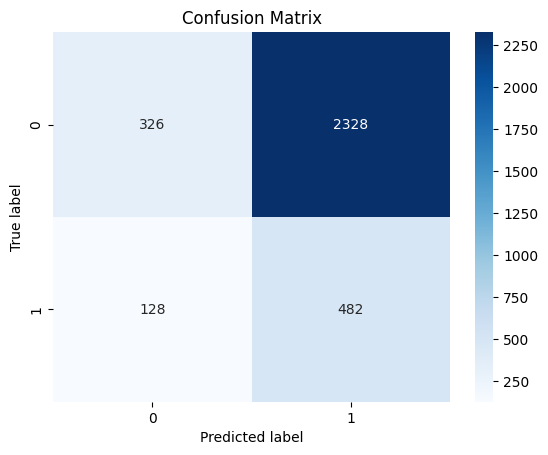

In [137]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## SVM Model

In [138]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

SVM Algorithm
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2654
           1       0.43      0.38      0.40       610

    accuracy                           0.79      3264
   macro avg       0.64      0.63      0.64      3264
weighted avg       0.78      0.79      0.78      3264

[[2340  314]
 [ 377  233]]
ACC:  0.788296568627451


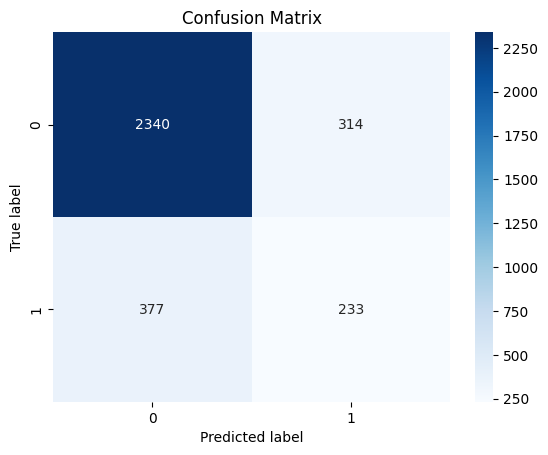

In [139]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Apply Machine Learning Models on PC 1 Dataset

In [140]:
pc1_df

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,false
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,true
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80.0,44.0,11.0,31.0,29.0,66.0,192.0,126.0,17.0,true
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97.0,41.0,12.0,24.0,28.0,75.0,229.0,152.0,38.0,true
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457.0,71.0,48.0,49.0,64.0,397.0,1397.0,942.0,178.0,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,6.0,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,...,6.0,0.0,0.0,2.0,10.0,3.0,18.0,8.0,7.0,false
1105,10.0,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,...,10.0,0.0,0.0,1.0,14.0,5.0,28.0,15.0,9.0,false
1106,5.0,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,...,5.0,0.0,0.0,0.0,8.0,5.0,11.0,6.0,5.0,false
1107,18.0,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,...,18.0,0.0,0.0,1.0,22.0,24.0,61.0,50.0,15.0,false


In [141]:
pc1_df.columns

Index(['loc', 'v(g)', 'ev(g)', 'iv(G)', 'N', 'V', 'L', 'D', 'I', 'E', 'B', 'T',
       'lOCode', 'lOComment', 'locCodeAndComment', 'lOBlank', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

In [142]:
pc1_df.describe()


,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03,...,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,23.376105,5.510730,2.766817,3.321371,117.393417,699.711217,0.129414,15.396267,32.904472,2.882288e+04,...,1601.273030,22.434626,4.696123,0.944995,6.745717,13.307665,20.892876,66.493417,50.901894,9.576555
std,35.284017,8.958976,5.567704,6.401998,197.336888,1509.545684,0.146952,16.337508,35.387685,1.706436e+05,...,9480.199989,33.574645,10.518447,3.345297,12.301210,8.182224,29.051434,111.703236,86.308689,16.540676
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,7.000000,1.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.710000,14.040000,5.581300e+02,...,31.010000,7.000000,0.000000,0.000000,1.000000,8.000000,6.000000,15.000000,10.000000,1.000000
50%,13.000000,3.000000,1.000000,2.000000,58.000000,275.100000,0.080000,11.610000,23.570000,3.189170e+03,...,177.180000,13.000000,0.000000,0.000000,2.000000,12.000000,12.000000,33.000000,24.000000,5.000000
75%,26.000000,6.000000,3.000000,3.000000,126.000000,674.040000,0.160000,20.500000,41.150000,1.238156e+04,...,687.860000,24.000000,5.000000,1.000000,8.000000,17.000000,25.000000,72.000000,56.000000,11.000000
max,602.000000,136.000000,123.000000,123.000000,2785.000000,25942.690000,2.000000,270.660000,598.330000,4.279633e+06,...,237757.400000,600.000000,159.000000,48.000000,225.000000,99.000000,538.000000,1641.000000,1144.000000,236.000000


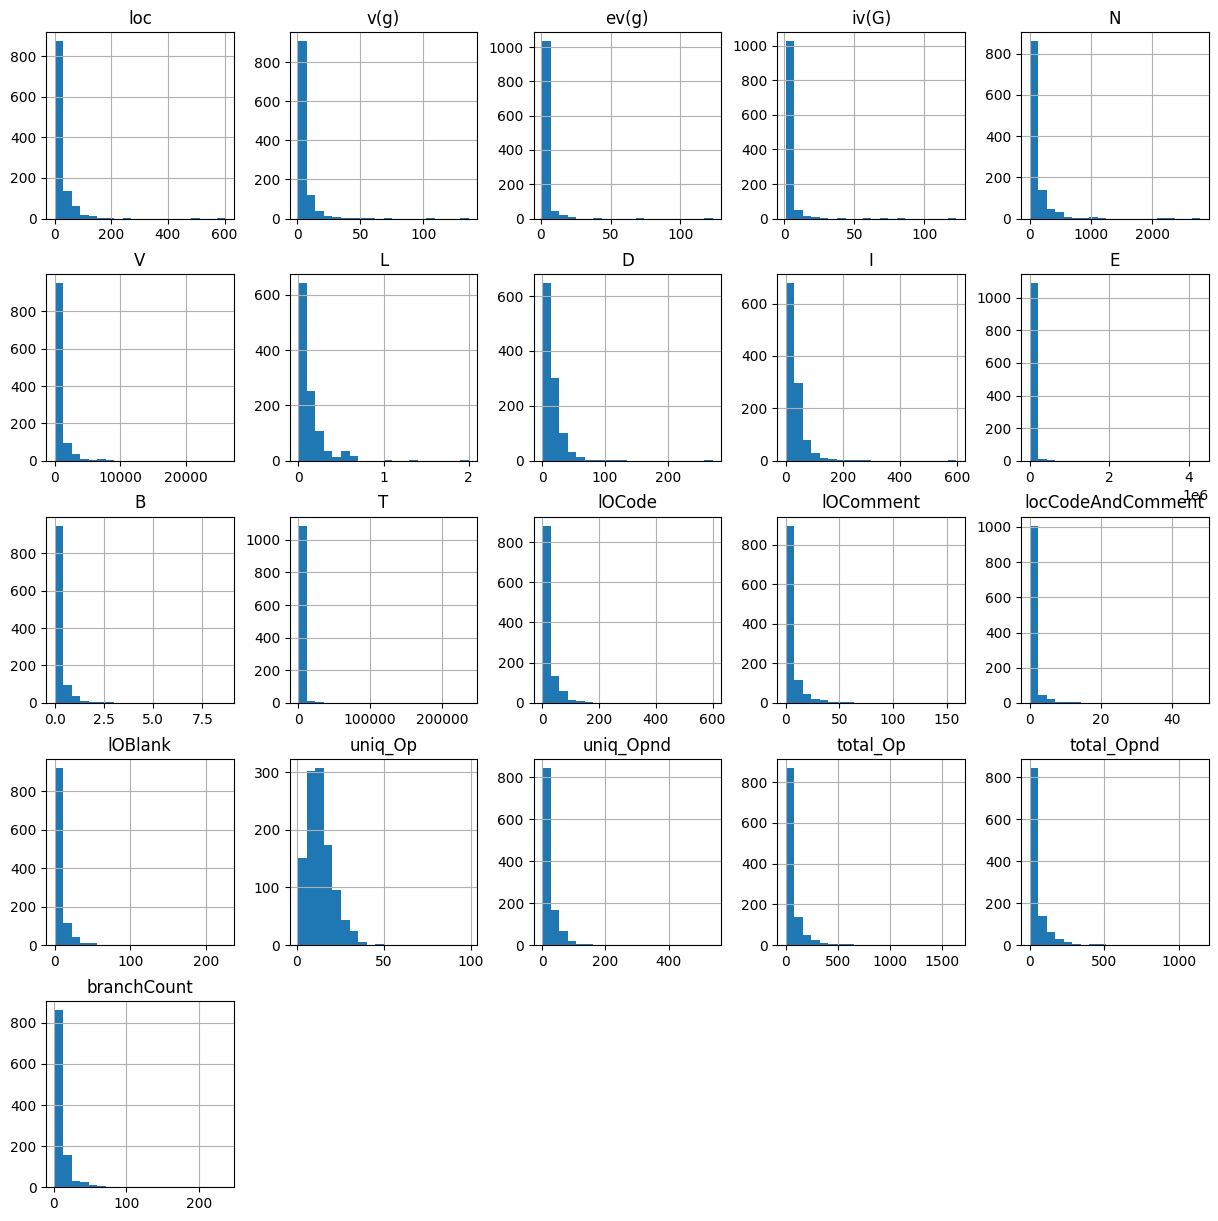

In [143]:
import matplotlib.pyplot as plt

pc1_df.hist(bins=20, figsize=(15, 15))
plt.show()

<ipython-input-144-9ca736f518af>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



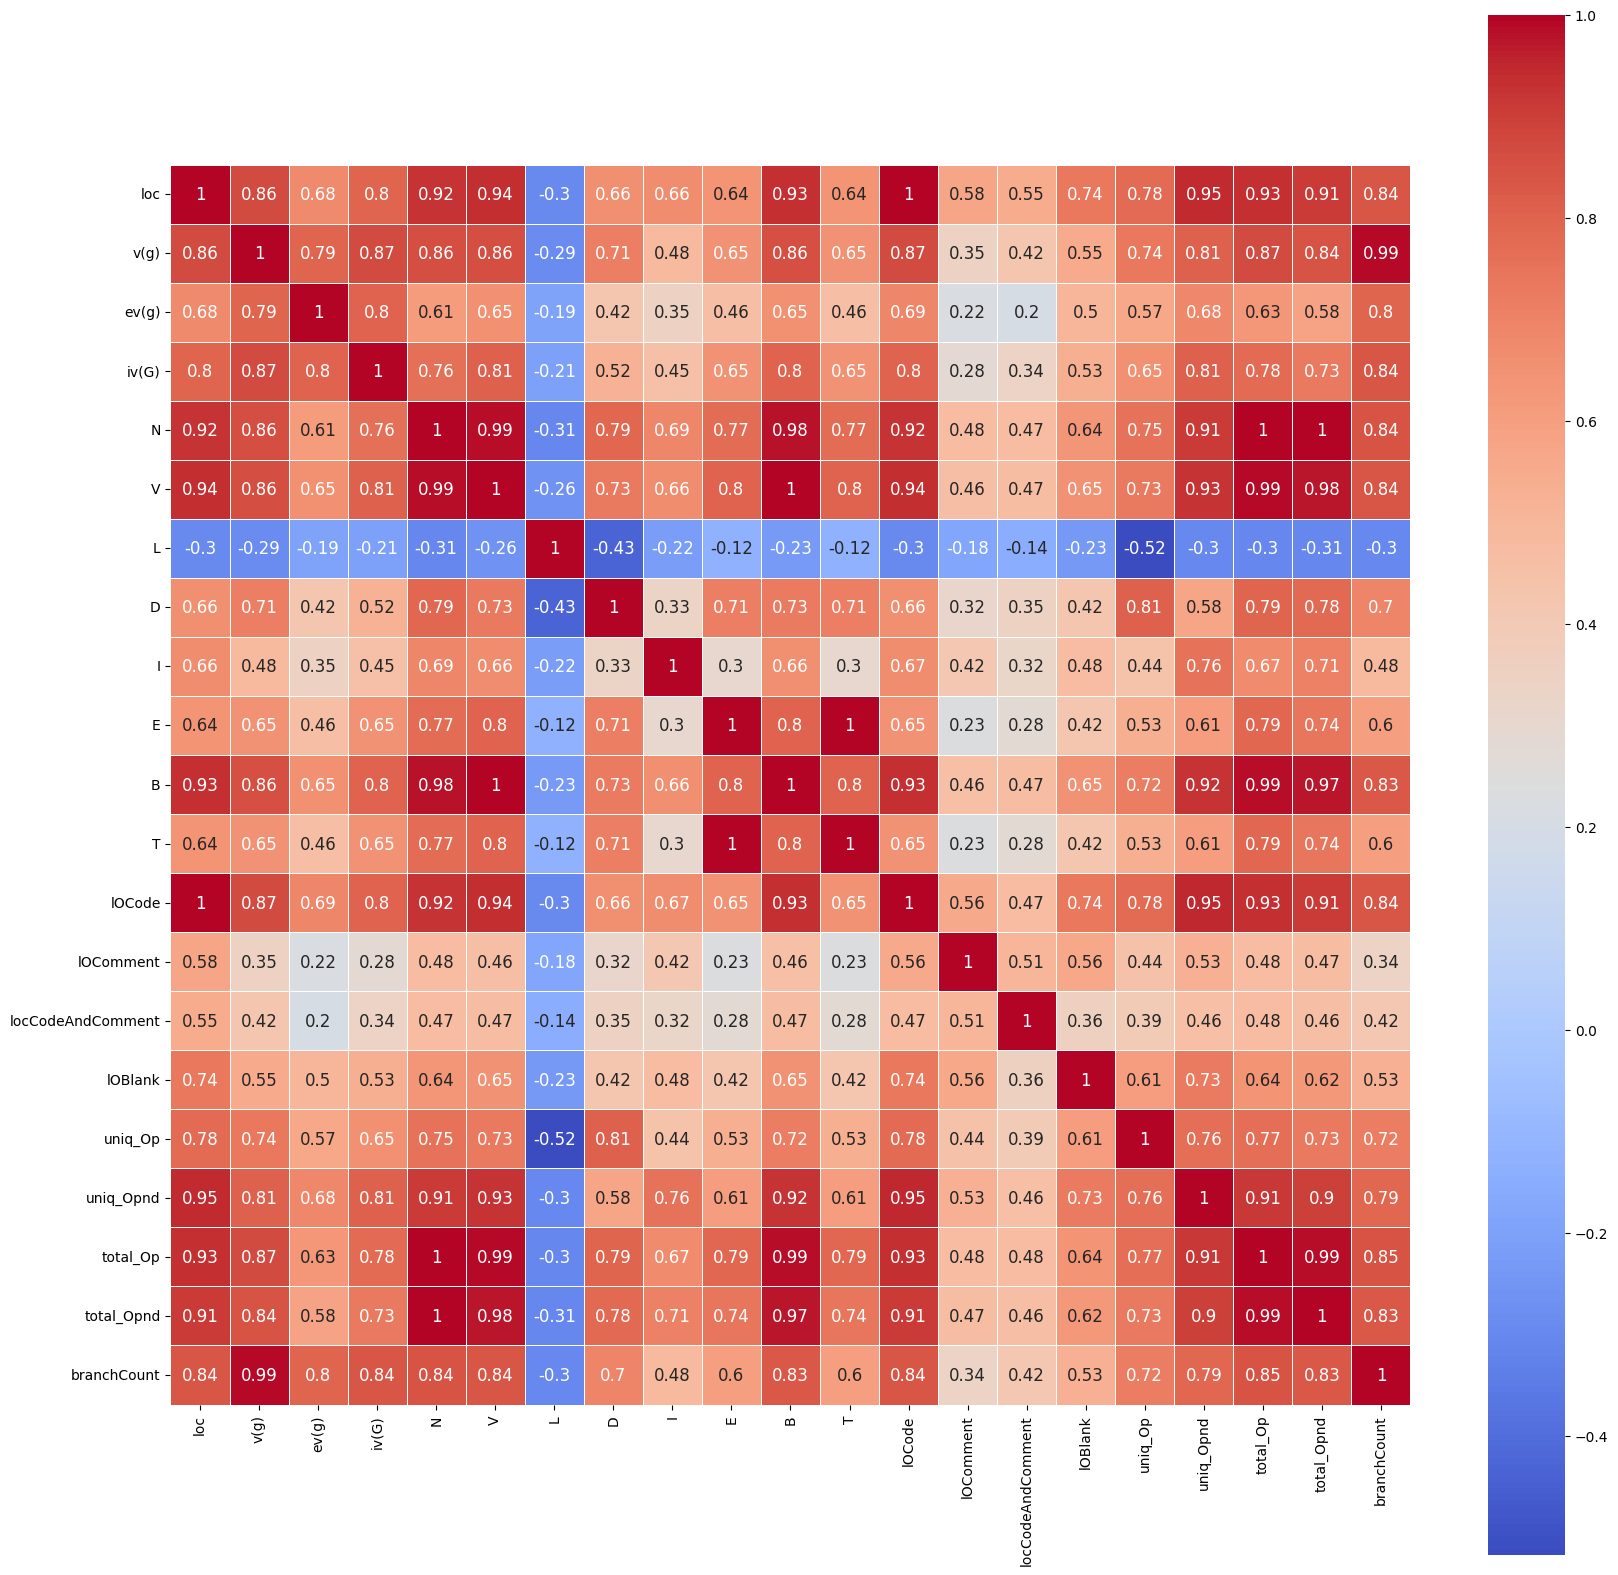

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pc1_df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=.5, linecolor='white', square=True, annot_kws={"size": 12})
plt.show()




In [145]:
pc1_df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(G)                0
N                    0
V                    0
L                    0
D                    0
I                    0
E                    0
B                    0
T                    0
lOCode               0
lOComment            0
locCodeAndComment    0
lOBlank              0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [146]:
pc1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                1109 non-null   float64
 1   v(g)               1109 non-null   float64
 2   ev(g)              1109 non-null   float64
 3   iv(G)              1109 non-null   float64
 4   N                  1109 non-null   float64
 5   V                  1109 non-null   float64
 6   L                  1109 non-null   float64
 7   D                  1109 non-null   float64
 8   I                  1109 non-null   float64
 9   E                  1109 non-null   float64
 10  B                  1109 non-null   float64
 11  T                  1109 non-null   float64
 12  lOCode             1109 non-null   float64
 13  lOComment          1109 non-null   float64
 14  locCodeAndComment  1109 non-null   float64
 15  lOBlank            1109 non-null   float64
 16  uniq_Op            1109 

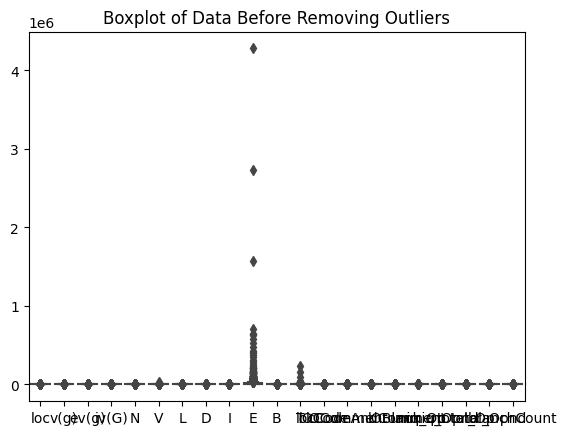

In [147]:
# Before removing outliers
sns.boxplot(data=pc1_df)
plt.title("Boxplot of Data Before Removing Outliers")
plt.show()

In [148]:
# Remove outliers using IQR method
Q1 = pc1_df.quantile(0.25)
Q3 = pc1_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pc1_df = pc1_df[~((pc1_df < lower_bound) | (pc1_df > upper_bound)).any(axis=1)]

<ipython-input-148-ebb4e1c52fa6>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-148-ebb4e1c52fa6>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-148-ebb4e1c52fa6>:7: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



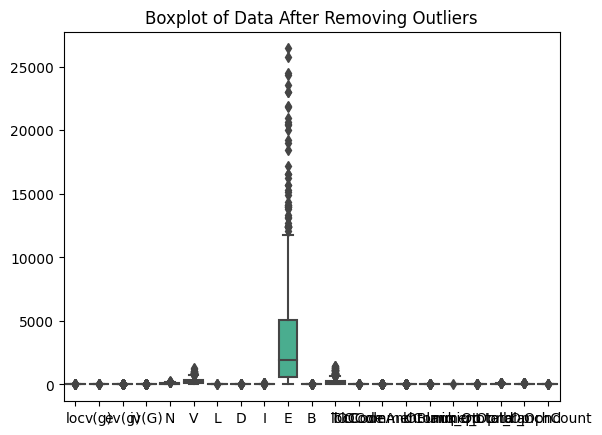

In [149]:
# After removing outliers
sns.boxplot(data=pc1_df)
plt.title("Boxplot of Data After Removing Outliers")
plt.show()


In [150]:
pc1_df.defects.value_counts()

false    655
true      25
Name: defects, dtype: int64

In [151]:
pc1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 8 to 1107
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                680 non-null    float64
 1   v(g)               680 non-null    float64
 2   ev(g)              680 non-null    float64
 3   iv(G)              680 non-null    float64
 4   N                  680 non-null    float64
 5   V                  680 non-null    float64
 6   L                  680 non-null    float64
 7   D                  680 non-null    float64
 8   I                  680 non-null    float64
 9   E                  680 non-null    float64
 10  B                  680 non-null    float64
 11  T                  680 non-null    float64
 12  lOCode             680 non-null    float64
 13  lOComment          680 non-null    float64
 14  locCodeAndComment  680 non-null    float64
 15  lOBlank            680 non-null    float64
 16  uniq_Op            680 no

In [152]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the data
pc1_df['defects'] = le.fit_transform(pc1_df[['defects']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

<ipython-input-152-d56621ff230d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
# Separate the features and target variable
X = pc1_df.drop(['defects'], axis=1)
y = pc1_df['defects']

## Train Test Split data into 70:30 ratio

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Normalized data using standard Scaler 

In [155]:
from sklearn.preprocessing import StandardScaler
# Apply data normalization to the training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

## Remove constant features

In [156]:
# Step 3: Remove constant features
constant_columns = np.all(X_train_normalized == X_train_normalized[0, :], axis=0)
X_train_nonconstant = X_train_normalized[:, ~constant_columns]

In [157]:
constant_columns2 = np.all(X_test_normalized == X_test_normalized[0, :], axis=0)
X_test_nonconstant = X_test_normalized[:, ~constant_columns2]

In [158]:
X_train_nonconstant

array([[-0.8775758 , -0.96962121, -0.45675964, ..., -0.99972973,
        -1.03833797, -0.97125157],
       [-0.4859576 ,  0.09017143, -0.45675964, ..., -0.25871351,
        -0.28605658,  0.10577987],
       [-0.2248788 ,  0.09017143, -0.45675964, ...,  0.06548108,
        -0.05458538,  0.10577987],
       ...,
       [-1.00811521, -0.96962121, -0.45675964, ..., -0.81447568,
        -0.80686677, -0.97125157],
       [ 1.21105461,  2.20975672, -0.45675964, ...,  0.89912433,
         1.1606384 ,  2.25984277],
       [-1.53027281, -0.96962121, -0.45675964, ..., -1.27761082,
        -1.26980917, -0.97125157]])

## Feature selection using SelectKBest on the normalized training and testing set

In [159]:
from sklearn.feature_selection import SelectKBest, f_classif
# Apply feature selection using SelectKBest on the normalized training set
selector = SelectKBest(f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_nonconstant, y_train)
X_test_selected = selector.fit_transform(X_test_nonconstant, y_test)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

print(scores)

[0.31994684 0.06031999 0.02143734 0.20201221 0.20737306 0.26226824
 0.08638488 0.03926758 0.33495888 0.09619622 0.25506875 0.09619696
 0.3048464  0.08322673 0.13000661 1.         0.48015414 0.62962313
 0.22511238 0.17952465 0.04923985]


## Apply SMOTE to the selected features (only for training)

In [160]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
# apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_selected, y_train)

# print the original and resampled class distribution
print('Original class distribution:', y_train.shape)
print('Resampled class distribution:', y_resampled.shape)

Original class distribution: (476,)
Resampled class distribution: (922,)


In [161]:
X_train=X_resampled
y_train=y_resampled
X_test=X_test_selected


## Decision Tree

In [162]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       194
           1       0.23      0.70      0.34        10

    accuracy                           0.87       204
   macro avg       0.60      0.79      0.63       204
weighted avg       0.95      0.87      0.90       204

[[170  24]
 [  3   7]]
ACC:  0.8676470588235294


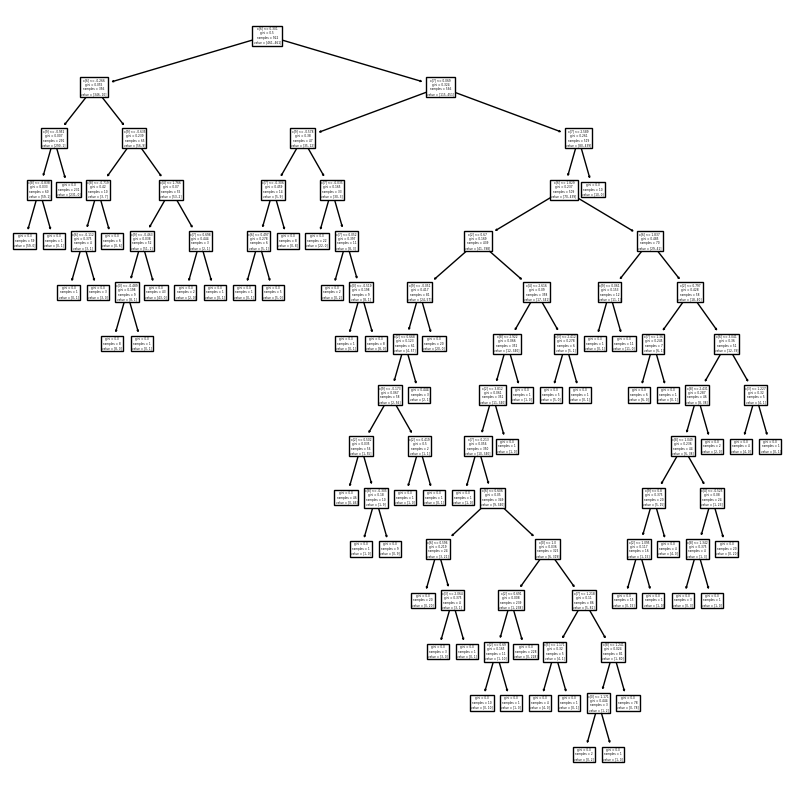

In [163]:
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(model, ax=ax)
plt.show()

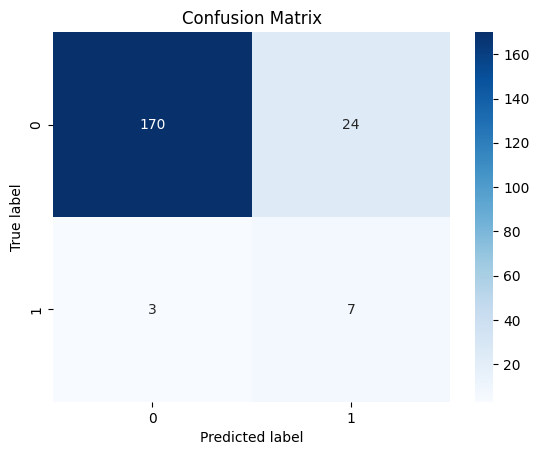

In [164]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## KNN Model

In [165]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       194
           1       0.19      0.90      0.31        10

    accuracy                           0.80       204
   macro avg       0.59      0.85      0.60       204
weighted avg       0.95      0.80      0.86       204

[[155  39]
 [  1   9]]
ACC:  0.803921568627451


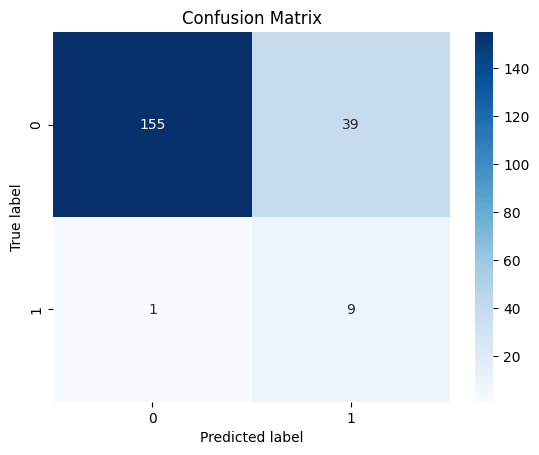

In [166]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Logistic Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Logistic Algorithm
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       194
           1       0.26      0.90      0.41        10

    accuracy                           0.87       204
   macro avg       0.63      0.89      0.67       204
weighted avg       0.96      0.87      0.90       204

[[169  25]
 [  1   9]]
ACC:  0.8725490196078431


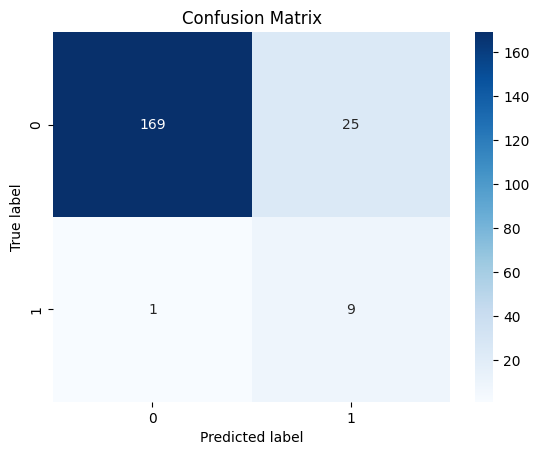

In [168]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Naive Bayes

In [169]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [170]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Naive Bayes Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Naive Bayes Algorithm
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       194
           1       0.16      0.80      0.26        10

    accuracy                           0.78       204
   macro avg       0.57      0.79      0.57       204
weighted avg       0.95      0.78      0.84       204

[[151  43]
 [  2   8]]
ACC:  0.7794117647058824


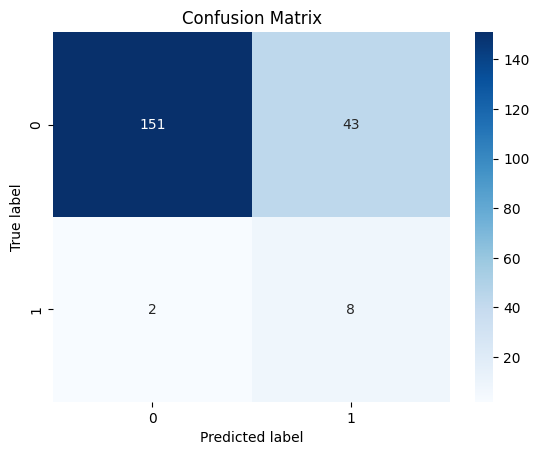

In [171]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forests Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forests Algorithm
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       194
           1       0.33      0.50      0.40        10

    accuracy                           0.93       204
   macro avg       0.65      0.72      0.68       204
weighted avg       0.94      0.93      0.93       204

[[184  10]
 [  5   5]]
ACC:  0.9264705882352942


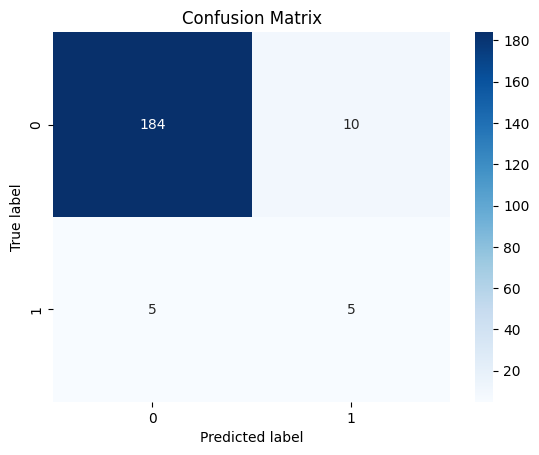

In [173]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## SVM Model

In [174]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

SVM Algorithm
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       194
           1       0.19      0.90      0.31        10

    accuracy                           0.80       204
   macro avg       0.59      0.85      0.60       204
weighted avg       0.95      0.80      0.86       204

[[155  39]
 [  1   9]]
ACC:  0.803921568627451


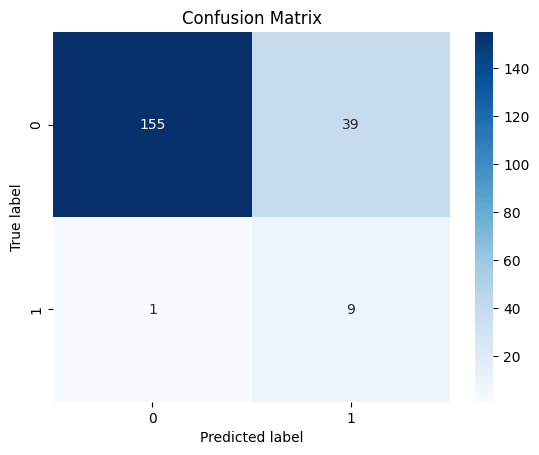

In [175]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()